# *`07_DecisionTrees`*

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Decision Trees are nested if else statements. Decision Trees use hyperplanes which run parallel to one of the axes to cut the coordinate system into higher cuboids.

**Advantages**
1. Decision Trees are intuitive and easy to understand.
2. Minimal data preparation is required.
3. The cost of using the tree for inference is logarithmic in the number of data point used to train the tree.

**Disadvantages**
1. Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting.
2. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
3. It is prone to errors for imbalanced datasets.

### What is CART Algorithm?

* It is used for regression and classification predicitve modelling problems.
* It is the foundation for algorithms like bagged decision trees, random forest and boosted decision trees.

**How it works ?**
* At each node True/False condition is raised on one of the features.
* The dataset is split into two subsets based on whether the condition is filfilled or not.
* The subsets become the input to two child nodes added to the tree.

\
**GOAL**

* Produce the purest possible distribution of labels at each node.

* To build an efficient decision tree, we need to find the most informative features. Decision Trees uses information gain for such purpose.

\
### **`Impurity`**

* It is the chance of being incorrect when a label is randomly assigned to an example in the same set.

* As the labels for features increases, impurity also increases.

\
> **Gini Impurity**

Gini impurity measures how often a randomly chosen element of a set would be incorrectly labeled if it were labeled randomly and independently according to the distribution of labels in the set. It reaches its minimum (zero) when all cases in the node fall into a single target category.

* Gini index can be the metric used to ask question at each point and build the tree recursively on each of the new nodes.
* The tree is divided until no further questions are left to ask.

\
$$Gini = 1 - \sum_{i = 1}^{C} (p_i)^2$$

``
The feature producing the least impurity is selected to split the tree.
``

\
> **Information Gain**

Information gain is a metric used to train decision trees. It measures the quality of a split. It is the amount of information gained about a feature.

Using Gini impurity

\
$$\text {Information gain} = I_{parent} - p * I_{left} - (1-p) * I_{right}$$

\
Using Entropy,

\
$$\text {Information gain} = E_{parent} - \text {weighted average} * E_{children}$$

where,

$I_{parent}$ = Gini impurity of the parent.

$I_{left}$ = Gini impurity on the left node

$I_{right}$ = Gini impurity on the right node

$E_{parent}$ = Entropy of the parent.

$E_{children}$ = Entropy of the children.

\
* The column having the highest value of information gain will be selected by the algorithm for splitting.

\
> **Entropy**

Entropy is a measure of the randomness in the information being processed. It is the measure of the disorder. Higher the entropy, the harder it is to draw anyy conclusions for that information.

``
More knowledge less entropy.
``

$$ Entropy = \sum_{i = 1}^{C} -p_i * log_2 (p_i)$$

where,

$p_i$ = is simply the frequentist probability of an element /class $'i'$ in our data.

\
e.g.: If the data has only two class $'yes'$ and $'no'$.

\
$$Entropy(D) = -p_{yes} * log_2(p_{yes}) - p_{no} * log_2(p_{no})$$

**Observations**
* More the uncertainty more is entropy
* For a 2 class problem:
  > The min entropy is 0.
  \
  The max entropy is 1.
* For more than 2 classes:
  > The min entropy is 0.
  \
  The max entropy can be greater than 1.
* Both $log_2 \text { and } log_e$ can be used to find the entropy.
* When the entropy of 0 is obtained, splits don't happen any further.


\
#### **Probability Vs. Entropy**

\
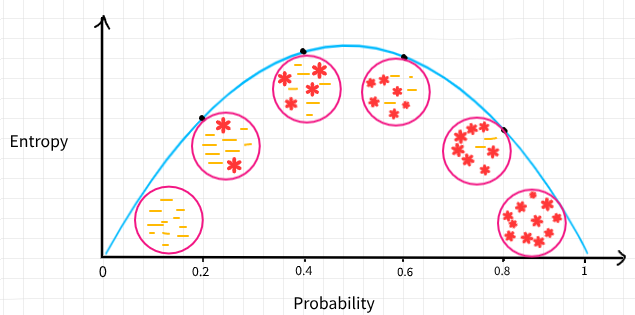

\
* Entropy is highest when the probility is between $(0.4 - 0.6)$.
* Entropy is $less$ when the probility is $0$ or $1$.


\
**Entropy for Continuous dataset**

\
For continuous datatsets entropy is given by the variance.

\

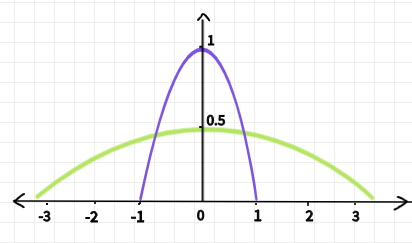

\
* Green data set has higher Entropy because variance is more.

\
**Important points**
> 1. Decision Tress applies a recursive greedy search algorithm in top to bottom fashion to find the information gain at every level of the tree. \
2. Gini is computationaly fast because squares of probability is calculated. \
3. Max value for Gini Impurity is 0.5. \
4. Max value for Entropy is 1 for binary classification. \
5. Sometimes, on some datasets entropy will give more balanced Decision Trees.
6. It is always better to use the `Hyperparameter tuning` using both.


#### Decision Trees: Hyperparameters
 Decision Trees tends to overfit. Hence, we can make use of the below hyperparameters to tune the Decision Trees.

 * **Depth of tree:** max_depth of the tree

 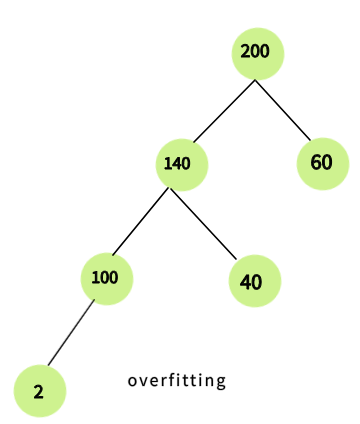        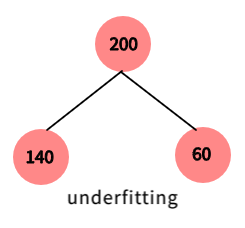

 * **max_depth:** 1. If set to low it will cause underfitting. If set to high it will overfit. Optimum value is a must.

* **criterion:** 'gini', 'entropy': It doesn't affect much, preferred gini.
* **splitter:** 'best', 'random': If random: Overfitting is reduced. If if best: overfitting is present.
* **min_samples_split:** If no. of rows are less than specified min_samples split then splitting won't happen any further.
* **min_samples_leaf:** Similar to min_samples_split
* **max_features:** How many columns you want to provide to decision trees to perform splitting. It is to reduce randomness. The number of columns provided will be selected randomly.
* **max_leaf_nodes:** How many leaf nodes should be created.
* **min_impurity_decrease:** Decide min impurity value. The impurity should be greater than set impurity value.



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [2]:
!wget https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day65-random-forest/heart.csv

--2024-02-24 15:54:37--  https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day65-random-forest/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2024-02-24 15:54:37 (79.7 MB/s) - ‘heart.csv’ saved [11328/11328]



In [3]:
# Import the data
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1],
                                                    data.iloc[:,-1],
                                                    test_size = 0.2,
                                                    random_state = 42)

len(X_train), len(X_test), len(y_train), len(y_test)

(242, 61, 242, 61)

In [21]:
# Hyperparameter Tuning
param_grid = {
    'max_depth' : [None, 2, 4, 6, 8, 10],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : [0.23, 0.25, 0.5, 0.8, 1.0],
    'min_samples_split' : [0.25, 0.5, 0.75, 1.0]
}

# Setup GridSearchCV
classifier = GridSearchCV(estimator = DecisionTreeClassifier(),
                          param_grid = param_grid,
                          scoring = 'accuracy',
                          cv = 5,
                          n_jobs = -1)

# Fit the classifier
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': [0.23, 0.25, 0.5, 0.8, 1.0],
                         'min_samples_split': [0.25, 0.5, 0.75, 1.0]},
             scoring='accuracy')

In [22]:
# Find the best score and the best Params
print(f"Best Score : {classifier.best_score_}")
print(f"Best Classifier : {classifier.best_params_}")

Best Score : 0.7690476190476192
Best Classifier : {'criterion': 'entropy', 'max_depth': 2, 'max_features': 0.25, 'min_samples_split': 0.5}


In [24]:
# Creat eteh decision tree model using the best params
dtree_classifier = DecisionTreeClassifier(criterion = 'entropy',
                                          max_depth = 2,
                                          max_features = 0.25,
                                          min_samples_split = 0.5)

# Fit the training data
dtree_classifier.fit(X_train, y_train)

# Evaluate on the test data
dtree_classifier.score(X_test, y_test)

0.7213114754098361

In [25]:
# !pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.7 MB/s eta 0:00:00


In [30]:
# Decision Tree visualization
import graphviz.backend as be
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import dtreeviz

In [69]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'sans_serif'

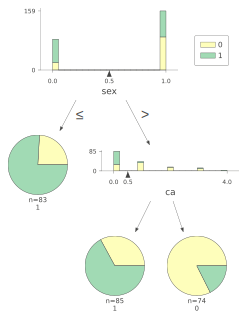

In [71]:
modelDT = dtreeviz.model(dtree_classifier,
                        X_train,
                        y_train,
                        feature_names = dtree_classifier.feature_names_in_,
                        class_names = [0,1])
modelDT.view()

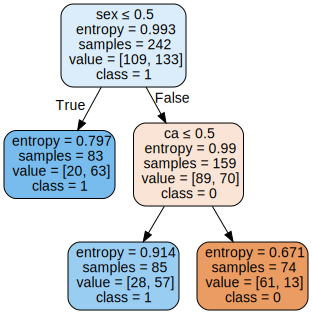

In [47]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT file
dot_data = export_graphviz(dtree_classifier, out_file=None,
                           feature_names=dtree_classifier.feature_names_in_,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)

# Visualize the decision tree from the DOT file
graph = graphviz.Source(dot_data)
graph.render("decision_tree_visualization")

# Display the decision tree
graph
